In [1]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import pickle

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times"],
    "font.size": 9
})

In [4]:
data = [ pickle.load(open(f"data/{fname}_randSVD_benchmarks.pkl", "rb")) for fname in ['logistic_map', 'lorenz63']]
titles = ['Logistic map', 'Lorenz63']

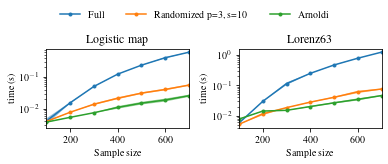

In [33]:
fig_width = 5.5 #Inches
fig_height = 2 #Inches

#Hardcoded
n_oversamples = 10
iterated_power = 3

fig, axes = plt.subplots(ncols=len(data), figsize=(fig_width, fig_height))

for idx in range(len(data)):
    results = data[idx]
    ax = axes[idx]
    solvers = results['solvers']
    means = results['means']
    stds = results['stds']
    sample_sizes = results['sample_sizes']

    for solver_idx, solver in enumerate(solvers):
        if solver == 'randomized':
            label = solver.capitalize() + f" p={iterated_power}, s={n_oversamples}"
        else:
            label = solver.capitalize()
        if idx == 0:
            ax.plot(sample_sizes, means[solver_idx], '.-', label=label)
        else:
            ax.plot(sample_sizes, means[solver_idx], '.-')
        ax.fill_between(sample_sizes, (means - stds)[solver_idx], (means + stds)[solver_idx], alpha=0.5)
    ax.set_ylabel("time (s)")
    ax.set_xlabel("Sample size")
    ax.set_yscale('log')
    ax.set_title(titles[idx])
    ax.set_xmargin(0)

fig.legend(bbox_to_anchor=(0.15, 1, 0.7, 0.2), borderaxespad=0, loc='lower center', mode='expand', ncol=3, frameon=False)
plt.tight_layout()
fig.savefig("figs/randomizedSVD_benchmarks.pdf",  bbox_inches='tight')